In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
train_data=pd.read_excel('Data_Train.xlsx')  # load dataset

In [3]:
pd.set_option('display.max_columns',None) # max columns visulization

In [4]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
train_data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [7]:
train_data['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
19h 50m      1
27h 55m      1
41h 20m      1
31h 30m      1
29h 40m      1
Name: Duration, Length: 368, dtype: int64

In [8]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
train_data.dropna(inplace=True)

In [10]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [11]:
train_data['Journey_day']=pd.to_datetime(train_data.Date_of_Journey,format='%d/%m/%Y').dt.day

In [12]:
train_data['Journey_month']=pd.to_datetime(train_data.Date_of_Journey,format='%d/%m/%Y').dt.month

In [13]:
train_data.drop('Date_of_Journey',axis=1,inplace=True)

In [14]:
train_data['Dep_hour']=pd.to_datetime(train_data.Dep_Time).dt.hour

In [15]:
train_data['Dep_min']=pd.to_datetime(train_data.Dep_Time).dt.minute

In [16]:
train_data.drop('Dep_Time',axis=1,inplace=True)

In [17]:
train_data['Arrival_hour']=pd.to_datetime(train_data.Arrival_Time).dt.hour

In [18]:
train_data['Arrival_min']=pd.to_datetime(train_data.Arrival_Time).dt.minute

In [19]:
train_data.drop('Arrival_Time',axis=1,inplace=True)

In [20]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [21]:
#Assigning and converting duration columns into list
duration=list(train_data['Duration'])
for i in range(len(duration)):
    if len(duration[i].split()) !=2:      #check if duration contain hours and mins
        if 'h' in duration[i]:
            duration[i]=duration[i].strip()+ " 0m" # Add 0 mins
        else:
            duration[i]="0h "+  duration[i]  #Add 0 hours

duration_hours=[]
duration_mins=[]
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep="h")[0])) #extract  hours from duration

    duration_mins.append(int(duration[i].split(sep="m")[0].split()[-1]) )#extract mins from duration


In [22]:
train_data['Duration_hours']=duration_hours
train_data['Duration_mins']=duration_mins

In [23]:
train_data.drop('Duration',axis=1,inplace=True)

In [24]:
train_data.head(40)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45
5,SpiceJet,Kolkata,Banglore,CCU → BLR,non-stop,No info,3873,24,6,9,0,11,25,2,25
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,In-flight meal not included,11087,12,3,18,55,10,25,15,30
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,No info,22270,1,3,8,0,5,5,21,5
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,In-flight meal not included,11087,12,3,8,55,10,25,25,30
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,8625,27,5,11,25,19,15,7,50


In [25]:
 train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

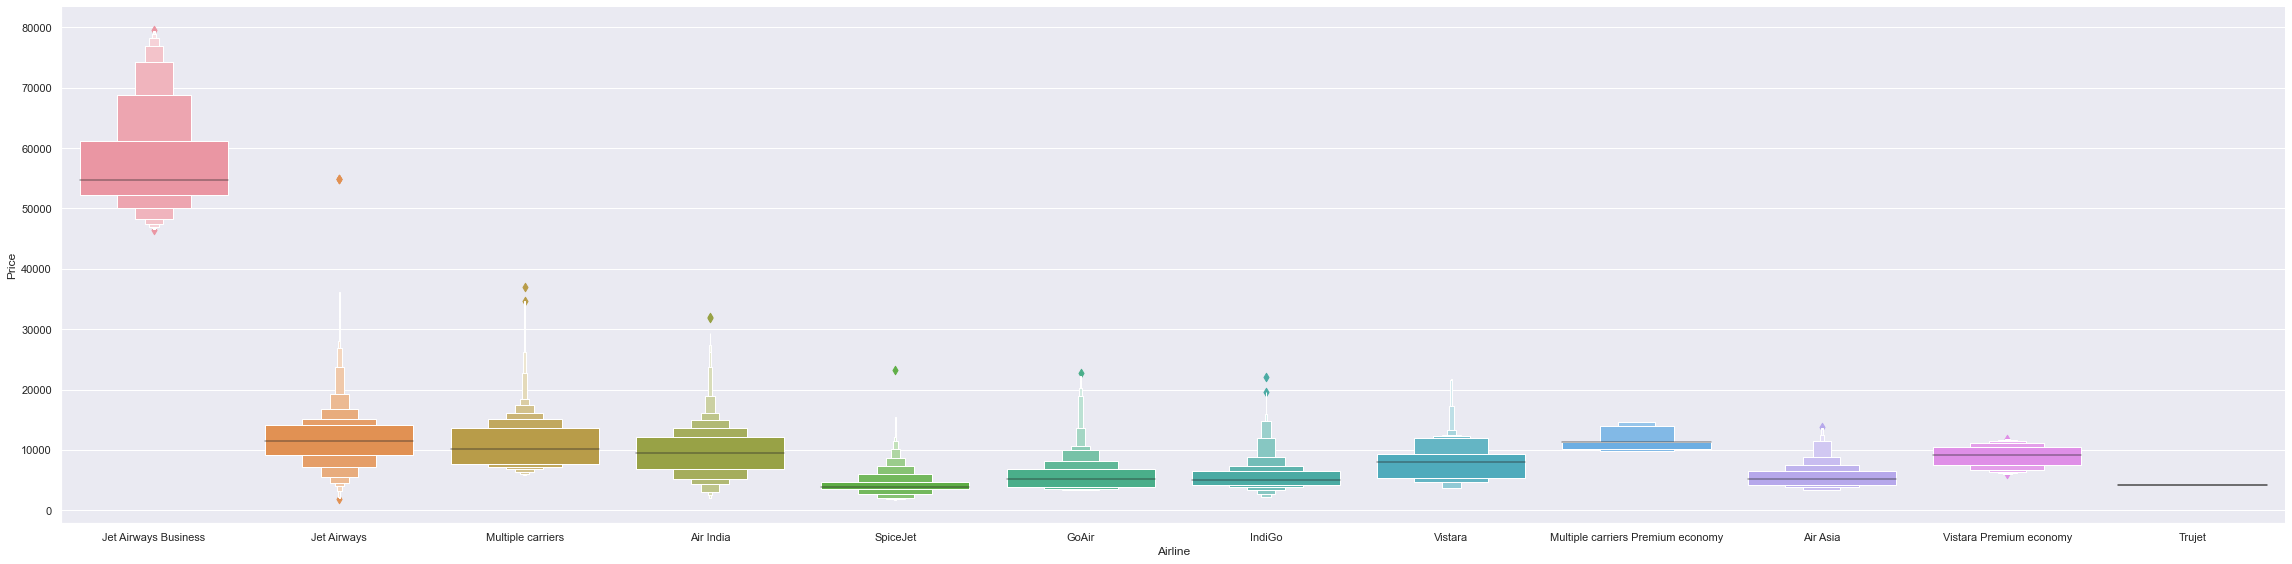

In [26]:
sns.catplot(y='Price',x='Airline',data=train_data.sort_values('Price',ascending=False),kind='boxen',height=8,aspect=4)
plt.show()

In [27]:
train_data.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [28]:
train_data.replace({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4},inplace=True)

In [29]:
train_data.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [30]:
train_data.Source.unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

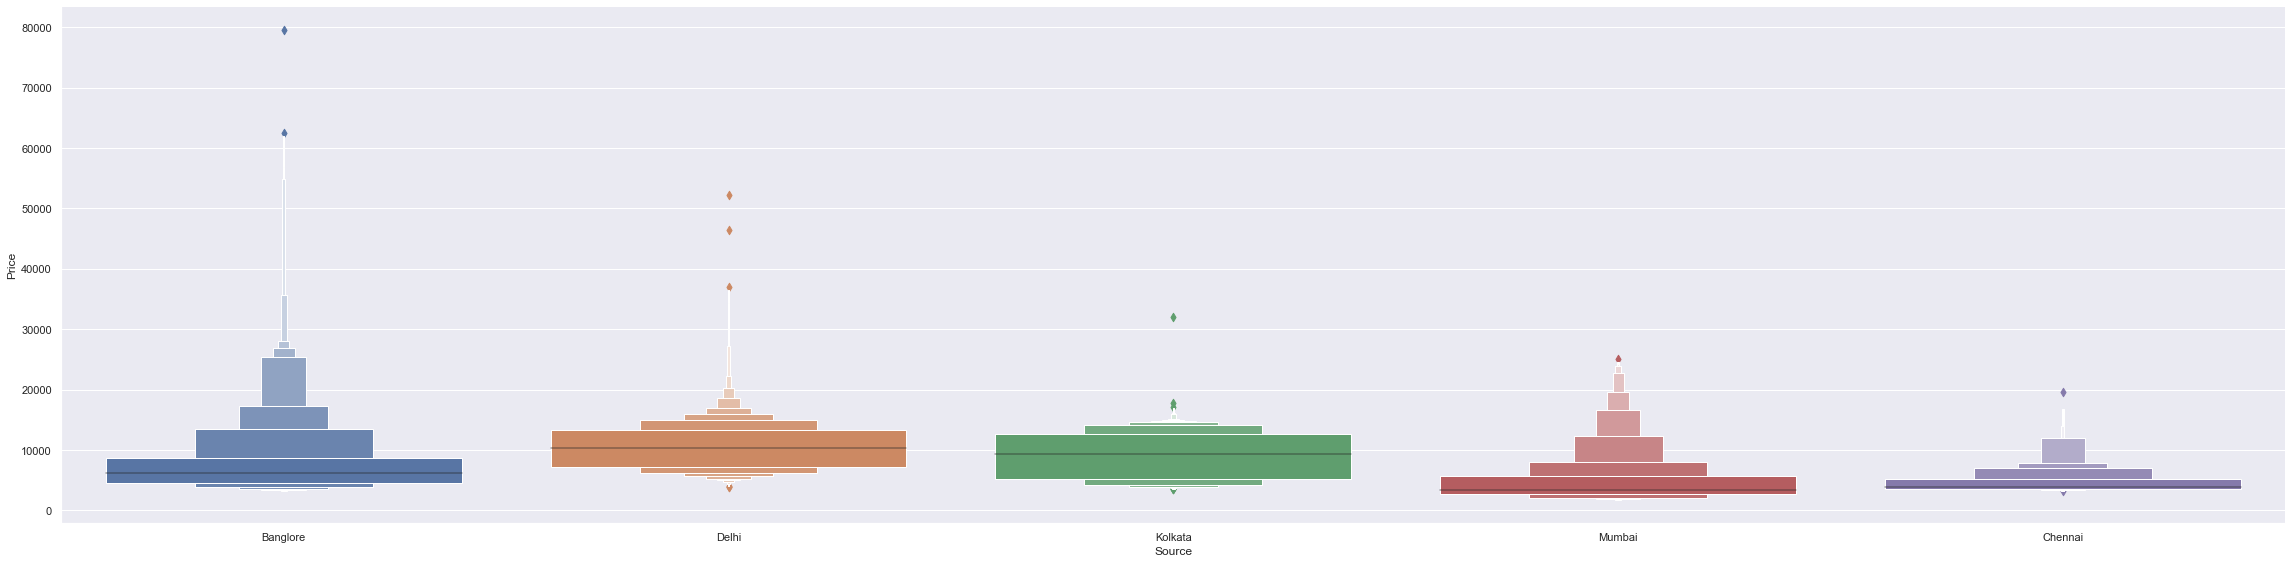

In [31]:
sns.catplot(y='Price',x='Source',data=train_data.sort_values('Price',ascending=False),kind='boxen',height=8,aspect=4)
plt.show()

In [32]:
train_data.Destination.unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [33]:
train_data.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [34]:
train_data.drop(['Additional_Info','Route'],axis=1,inplace=True)

In [35]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [36]:
Airline=train_data[['Airline']]
Airline=pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [37]:
Source=train_data[['Source']]
Source=pd.get_dummies(Source,drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [38]:
Destination=train_data[['Destination']]
Destination=pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [39]:
data_train=pd.concat([train_data,Source,Destination,Airline],axis=1)

In [40]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0


In [41]:
data_train.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [42]:
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,3897,24,3,22,20,1,10,2,50,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
1,2,7662,1,5,5,50,13,15,7,25,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0


In [43]:
test_data=pd.read_excel('Test_set.xlsx')
pd.set_option('display.max_columns',None)

In [44]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [45]:
test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [46]:
test_data.shape

(2671, 10)

In [47]:
test_data['Journey_day']=pd.to_datetime(test_data.Date_of_Journey,format='%d/%m/%Y').dt.day
test_data['Journey_month']=pd.to_datetime(test_data.Date_of_Journey,format='%d/%m/%Y').dt.month

In [48]:
test_data.drop('Date_of_Journey',axis=1,inplace=True)

In [49]:
test_data['Dep_hour']=pd.to_datetime(test_data.Dep_Time).dt.hour
test_data['Dep_min']=pd.to_datetime(test_data.Dep_Time).dt.minute

In [50]:
test_data.drop('Dep_Time',axis=1,inplace=True)

In [51]:
test_data['Arrival_hour']=pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data['Arrival_min']=pd.to_datetime(test_data.Arrival_Time).dt.minute

In [52]:
test_data.drop('Arrival_Time',axis=1,inplace=True)

In [53]:
test_data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,6,20,10,20


In [54]:
#Assigning and converting duration columns into list
duration=list(test_data['Duration'])
for i in range(len(duration)):
    if len(duration[i].split()) !=2:      #check if duration contain hours and mins
        if 'h' in duration[i]:
            duration[i]=duration[i].strip()+ " 0m" # Add 0 mins
        else:
            duration[i]="0h "+  duration[i]  #Add 0 hours

duration_hours=[]
duration_mins=[]
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep="h")[0])) #extract  hours from duration

    duration_mins.append(int(duration[i].split(sep="m")[0].split()[-1]) )#extract mins from duration


In [55]:
test_data['Duration_hours']=duration_hours
test_data['Duration_mins']=duration_mins

In [56]:
test_data.drop('Duration',axis=1,inplace=True)

In [57]:
test_data.replace({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4},inplace=True)

In [58]:
test_data.drop(['Additional_Info','Route'],axis=1,inplace=True)

In [59]:
test_data.head()

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,1,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,1,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,0,24,6,23,55,2,45,2,50


In [60]:
Airline=test_data[['Airline']]
Airline=pd.get_dummies(Airline,drop_first=True)

In [61]:
Source=test_data[['Source']]
Source=pd.get_dummies(Source,drop_first=True)

In [62]:
Destination=test_data[['Destination']]
Destination=pd.get_dummies(Destination,drop_first=True)

In [63]:
data_test=pd.concat([test_data,Source,Destination,Airline],axis=1)

In [64]:
data_test.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [65]:
data_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,1,6,6,17,30,4,25,10,55,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


#feature selection

In [66]:
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,3897,24,3,22,20,1,10,2,50,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
1,2,7662,1,5,5,50,13,15,7,25,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0


In [67]:
data_train.shape

(10682, 30)

In [68]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy'],
      dtype='object')

In [69]:
X=data_train.loc[:,['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy']]
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,24,3,22,20,1,10,2,50,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
1,2,1,5,5,50,13,15,7,25,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0


In [70]:
y=data_train.iloc[:,1]
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

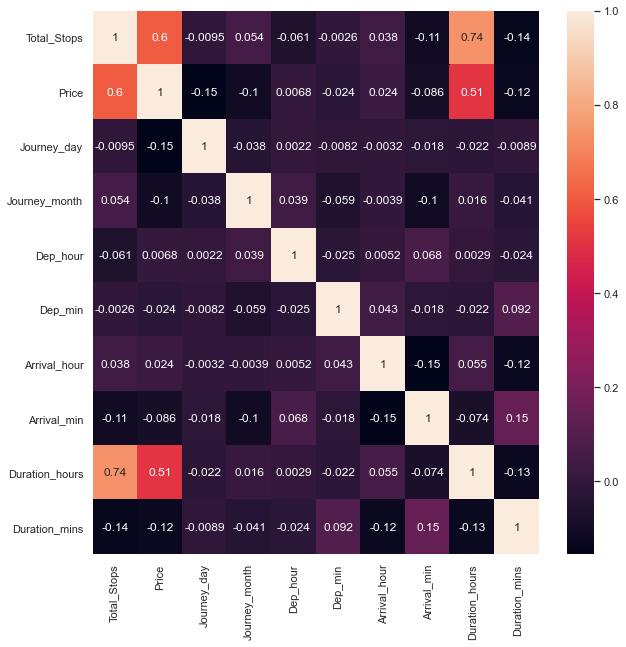

In [71]:
#finds the corelation dependent and independent attributes
plt.figure(figsize=(10,10))
sns.heatmap(train_data.corr(),annot=True)
plt.show()

In [72]:
#feature importance using extratreeregressor
from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [73]:
print(selection.feature_importances_)

[2.36852328e-01 1.44284592e-01 5.35692220e-02 2.48087034e-02
 2.16768679e-02 2.66760126e-02 1.91847798e-02 1.17526909e-01
 1.73833362e-02 5.76042777e-04 8.94111150e-03 3.42019776e-03
 7.40462435e-03 1.18444640e-02 1.14905809e-02 5.03165324e-03
 5.16574241e-04 2.45688511e-02 9.34345125e-03 1.95503349e-03
 1.68712364e-02 1.40511521e-01 6.73988139e-02 1.89833665e-02
 8.35770403e-04 3.06146681e-03 1.06967426e-04 5.08078906e-03
 9.47325572e-05]


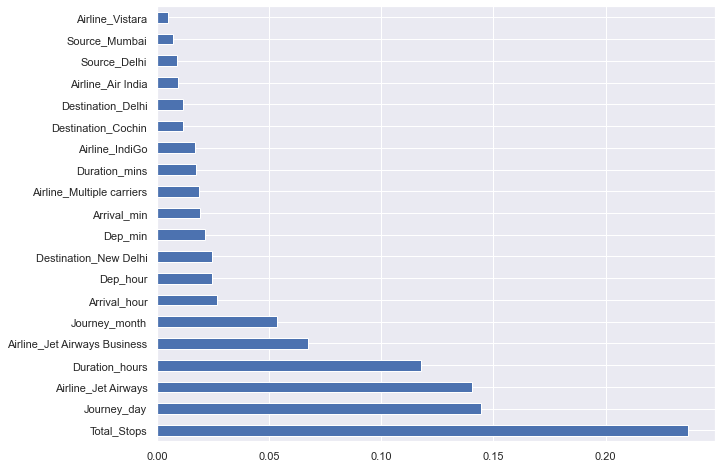

In [74]:
#graph of feature importnce
plt.figure(figsize=(10,8))
feat_importance=pd.Series(selection.feature_importances_,index=X.columns)
feat_importance.nlargest(20).plot(kind='barh')
plt.show()

In [75]:
#modelfitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [76]:
from sklearn.ensemble import RandomForestRegressor
rf_reg=RandomForestRegressor()

In [77]:
rf_reg.fit(X_train,y_train)

RandomForestRegressor()

In [78]:
y_pred=rf_reg.predict(X_test)

In [79]:
rf_reg.score(X_train,y_train)

0.9556979375979285

In [80]:
rf_reg.score(X_test,y_test)

0.8141246418685472

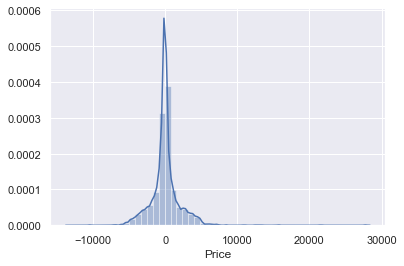

In [81]:
sns.distplot(y_test-y_pred)

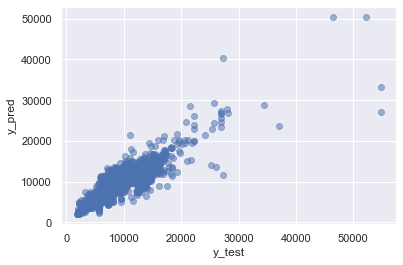

In [82]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [83]:
from sklearn import metrics

In [84]:
print('MAE',metrics.mean_absolute_error(y_test,y_pred))
print("MSE",metrics.mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE 1241.053600030825
MSE 4361226.050161201
RMSE 2088.3548669134757


In [85]:
metrics.r2_score(y_test,y_pred)

0.8141246418685472

In [86]:
from sklearn.model_selection import RandomizedSearchCV  

In [87]:
#random search cv
n_estimators=[100, 144, 188, 233, 277, 322, 366, 411, 455, 500]
print(n_estimators)

max_features=['auto','sqrt']

max_depth=[5, 10, 15, 20, 25, 30]

print(max_depth)

# min_simples_split=[2,5,10,15,100]

# min_simples_leaf=[1,2,5,10]

[100, 144, 188, 233, 277, 322, 366, 411, 455, 500]
[5, 10, 15, 20, 25, 30]


In [88]:
#random grid
random_grid={'n_estimators':n_estimators,
             'max_features':max_features,
             'max_depth':max_depth    
}

In [89]:
rf_cv=RandomizedSearchCV(rf_reg,random_grid,n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [90]:
rf_cv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=277, max_features=auto, max_depth=15 ...............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=277, max_features=auto, max_depth=15, total=   8.3s
[CV] n_estimators=277, max_features=auto, max_depth=15 ...............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.2s remaining:    0.0s


[CV]  n_estimators=277, max_features=auto, max_depth=15, total=   9.4s
[CV] n_estimators=277, max_features=auto, max_depth=15 ...............
[CV]  n_estimators=277, max_features=auto, max_depth=15, total=   9.0s
[CV] n_estimators=277, max_features=auto, max_depth=15 ...............
[CV]  n_estimators=277, max_features=auto, max_depth=15, total=   8.0s
[CV] n_estimators=277, max_features=auto, max_depth=15 ...............
[CV]  n_estimators=277, max_features=auto, max_depth=15, total=   8.1s
[CV] n_estimators=411, max_features=auto, max_depth=15 ...............
[CV]  n_estimators=411, max_features=auto, max_depth=15, total=  12.7s
[CV] n_estimators=411, max_features=auto, max_depth=15 ...............
[CV]  n_estimators=411, max_features=auto, max_depth=15, total=  11.8s
[CV] n_estimators=411, max_features=auto, max_depth=15 ...............
[CV]  n_estimators=411, max_features=auto, max_depth=15, total=  11.5s
[CV] n_estimators=411, max_features=auto, max_depth=15 ...............
[CV]  

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  5.3min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [100, 144, 188, 233,
                                                         277, 322, 366, 411,
                                                         455, 500]},
                   random_state=42, verbose=2)

In [91]:
rf_cv.best_params_

{'n_estimators': 411, 'max_features': 'auto', 'max_depth': 15}

In [92]:
prediction=rf_cv.predict(X_test)

In [93]:
rf_cv.score(X_test,y_test)

0.8300151673955645

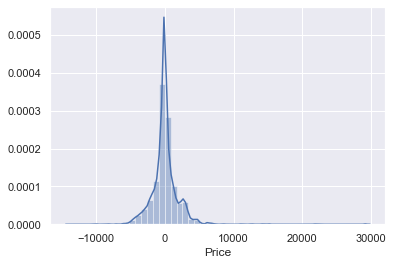

In [94]:
sns.distplot(y_test-prediction)

In [95]:
metrics.r2_score(y_test,prediction)

0.8300151673955645

In [96]:
import pickle

In [97]:
file= open("flight_rf.pkl",'wb')
pickle.dump(rf_cv,file)

In [98]:
model=open('flight_rf.pkl','rb')
forest=pickle.load(model)

In [99]:
y_prediction=forest.predict(X_test)

In [100]:
metrics.r2_score(y_test,y_prediction)

0.8300151673955645